In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv("/content/parkinsons.data")

In [ ]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape


(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, Y_train)
lr_accuracy = lr_model.score(X_test_scaled, Y_test)

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)
knn_accuracy = knn_model.score(X_test_scaled, Y_test)

In [ ]:
# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, Y_train)
svm_accuracy = svm_model.score(X_test_scaled, Y_test)

In [ ]:
# Compare Accuracies
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [lr_accuracy, knn_accuracy, svm_accuracy]

In [ ]:
best_model = models[np.argmax(accuracies)]
best_accuracy = accuracies[np.argmax(accuracies)]

In [ ]:
print(f"Accuracy of Logistic Regression: {lr_accuracy:.4f}")
print(f"Accuracy of K-Nearest Neighbors: {knn_accuracy:.4f}")
print(f"Accuracy of Support Vector Machine: {svm_accuracy:.4f}\n")

Accuracy of Logistic Regression: 0.8205
Accuracy of K-Nearest Neighbors: 0.7692
Accuracy of Support Vector Machine: 0.8718



In [ ]:
print(f"The best model based on accuracy is {best_model} with an accuracy of {best_accuracy:.4f}")

The best model based on accuracy is Support Vector Machine with an accuracy of 0.8718


In [ ]:
# Training SVM with best accuracy
model = SVC(kernel='linear')
model.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on test data
Y_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)

In [ ]:
print('\nAccuracy score of test data with SVM: ', test_data_accuracy)


Accuracy score of test data with SVM:  0.8717948717948718


In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_prediction)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 5  3]
 [ 2 29]]


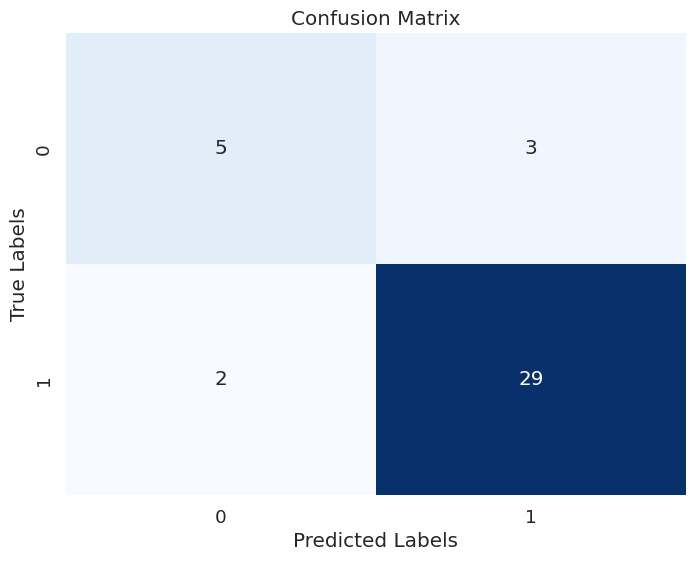

In [ ]:
# Visualizing Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculating Precision, Recall, F1 Score
precision = precision_score(Y_test, Y_test_prediction)
recall = recall_score(Y_test, Y_test_prediction)
f1 = f1_score(Y_test, Y_test_prediction)

In [ ]:
# Printing Results in Tabular Form
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [test_data_accuracy, precision, recall, f1]
})

In [ ]:
print("\nResults:")
print(results_df)



Results:
      Metric     Score
0   Accuracy  0.871795
1  Precision  0.906250
2     Recall  0.935484
3   F1 Score  0.920635


In [ ]:
def get_user_input():
    user_input = []
    print("Please enter the values for the features:")
    for i, feature in enumerate(X.columns):
        value = float(input(f"{feature}: "))
        user_input.append(value)
    return user_input

def predict_parkinsons_status(user_input):
    user_input_scaled = scaler.transform([user_input])
    prediction = model.predict(user_input_scaled)
    if prediction[0] == 1:
        print("")
        print("Parkinson's Disease Detected")
    else:
        print("")
        print("No Parkinson's Disease Detected")

# Get user input
user_input = get_user_input()

# Predict Parkinson's disease status
predict_parkinsons_status(user_input)


Please enter the values for the features:
MDVP:Fo(Hz): 119.992
MDVP:Fhi(Hz): 157.302
MDVP:Flo(Hz): 74.997
MDVP:Jitter(%): 0.00784
MDVP:Jitter(Abs): 0.00007
MDVP:RAP: 0.00370
MDVP:PPQ: 0.00554
Jitter:DDP: 0.01109
MDVP:Shimmer: 0.04374
MDVP:Shimmer(dB): 0.42600
Shimmer:APQ3: 0.02182
Shimmer:APQ5: 0.03130
MDVP:APQ: 0.02971
Shimmer:DDA: 0.06545
NHR: 0.02211
HNR: 21.033
RPDE: 0.414783
DFA: 0.815285
spread1: -4.813031	
spread2: 0.266482
D2: 2.301442
PPE: 0.284654
Parkinson's Disease Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def get_user_input():
    user_input = []
    print("Please enter the values for the features:")
    for i, feature in enumerate(X.columns):
        value = float(input(f"{feature}: "))
        user_input.append(value)
    return user_input

def predict_parkinsons_status(user_input):
    user_input_scaled = scaler.transform([user_input])
    prediction = model.predict(user_input_scaled)
    if prediction[0] == 1:
        print("")
        print("Parkinson's Disease Detected")
    else:
        print("")
        print("No Parkinson's Disease Detected")

# Get user input
user_input = get_user_input()

# Predict Parkinson's disease status
predict_parkinsons_status(user_input)

Please enter the values for the features:


NameError: name 'X' is not defined